In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
df = pd.read_csv('nasdaq_boolean.csv',index_col='date',parse_dates=['date'])
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')


In [42]:
df.head()

,symbol,streak_len,direction,occurrence,performance,vol,ma5_pos,ma200_pos,ma5_neg,ma200_neg,next_day_actual,bin_name
date,,,,,,,,,,,,
2024-11-27,AZTA,3,1,451,-1,1,1,0,0,1,0,3 1 -1 -1 1 1 0 0 1
2024-11-27,MIRA,3,-1,26,1,-1,0,1,1,0,0,3 -1 1 1 -1 0 1 1 0
2024-11-27,MNMD,4,1,28,-1,1,1,-1,0,0,0,4 1 -1 -1 1 1 -1 0 0
2024-11-27,FUNC,5,1,64,-1,1,1,1,0,0,0,5 1 -1 -1 1 1 1 0 0
2024-11-27,THRY,6,1,11,1,1,1,0,0,1,0,6 1 1 1 1 1 0 0 1


In [43]:
df['next_day_actual'].unique()

array([ 0,  1, -1])

In [44]:
df.dtypes

symbol             object
streak_len          int64
direction           int64
occurrence          int64
performance         int64
vol                 int64
ma5_pos             int64
ma200_pos           int64
ma5_neg             int64
ma200_neg           int64
next_day_actual     int64
bin_name           object
dtype: object

In [45]:
prediction_df = df[['streak_len', 'direction', 'occurrence', 'performance', 'vol', 'ma5_pos', 'ma200_pos', 'ma5_neg', 'ma200_neg', 'next_day_actual']]
prediction_df

,streak_len,direction,occurrence,performance,vol,ma5_pos,ma200_pos,ma5_neg,ma200_neg,next_day_actual
date,,,,,,,,,,
2024-11-27,3,1,451,-1,1,1,0,0,1,0
2024-11-27,3,-1,26,1,-1,0,1,1,0,0
2024-11-27,4,1,28,-1,1,1,-1,0,0,0
2024-11-27,5,1,64,-1,1,1,1,0,0,0
2024-11-27,6,1,11,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1962-01-16,3,-1,2,1,-1,0,0,-1,1,1
1962-01-09,5,-1,1,0,0,0,0,0,0,1
1962-01-08,4,-1,1,0,0,0,0,0,0,-1


In [46]:
prediction_df = prediction_df.dropna()
prediction_df.head()

,streak_len,direction,occurrence,performance,vol,ma5_pos,ma200_pos,ma5_neg,ma200_neg,next_day_actual
date,,,,,,,,,,
2024-11-27,3,1,451,-1,1,1,0,0,1,0
2024-11-27,3,-1,26,1,-1,0,1,1,0,0
2024-11-27,4,1,28,-1,1,1,-1,0,0,0
2024-11-27,5,1,64,-1,1,1,1,0,0,0
2024-11-27,6,1,11,1,1,1,0,0,1,0


In [47]:
prediction_df.isna().sum()

streak_len         0
direction          0
occurrence         0
performance        0
vol                0
ma5_pos            0
ma200_pos          0
ma5_neg            0
ma200_neg          0
next_day_actual    0
dtype: int64

### Scaling Numeric Features

In [48]:
from sklearn.model_selection import train_test_split
x = prediction_df[['streak_len', 'direction', 'occurrence', 'performance', 'vol', 'ma5_pos', 'ma200_pos', 'ma5_neg', 'ma200_neg']]
y = prediction_df['next_day_actual']
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=.5, random_state=42)

In [49]:
numeric_cols = x_train.select_dtypes(include = np.number).columns.tolist()
print(numeric_cols)

['streak_len', 'direction', 'occurrence', 'performance', 'vol', 'ma5_pos', 'ma200_pos', 'ma5_neg', 'ma200_neg']


In [50]:
from sklearn.preprocessing import MinMaxScaler # used to scale down outlier values that might affect the result
scaler = MinMaxScaler().fit(df[numeric_cols])

In [51]:
x_train[numeric_cols] = scaler.transform(x_train[numeric_cols])
x_val[numeric_cols] = scaler.transform(x_val[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [52]:
x_val.describe().loc[['min', 'max']]

,streak_len,direction,occurrence,performance,vol,ma5_pos,ma200_pos,ma5_neg,ma200_neg
min,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.863636,1.0,0.995794,1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1769309, 9)
(221164, 9)
(221164, 9)


### Training Data

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 
model.fit(x_train, y_train)
# n_estimator is used to build decision trees(100 in this case)
# n_jobs = -1 will create each levels of different decision trees at the same time using different threads rather than creating a complete tree and moving on to create the next one


RandomForestClassifier(n_jobs=-1, random_state=42)

### Predicting train data with the model 

In [55]:
y_train_preds = model.predict(x_train)

In [56]:
result_df = pd.DataFrame({
    'predicted_val': y_train_preds,
    'real_val': y_train,
    'truth_val': y_train_preds * y_train
})
result_df.sort_index(ascending=False)

,predicted_val,real_val,truth_val
date,,,
2024-11-27,1,0,0
2024-11-27,1,0,0
2024-11-27,-1,0,0
2024-11-27,-1,0,0
2024-11-27,1,0,0
...,...,...,...
1962-01-16,1,1,1
1962-01-09,1,1,1
1962-01-08,-1,-1,1


In [57]:
print("Predicter Values:\n",pd.Series(y_train_preds).value_counts())
print()
print("True Values:\n",y_train.value_counts())

Predicter Values:
 -1    905887
 1    862528
 0       894
Name: count, dtype: int64

True Values:
 next_day_actual
-1    846201
 1    842754
 0     80354
Name: count, dtype: int64


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_train_preds, y_train))
print(y_train_preds)

              precision    recall  f1-score   support

          -1       0.58      0.54      0.56    905887
           0       0.01      0.74      0.02       894
           1       0.56      0.55      0.55    862528

    accuracy                           0.55   1769309
   macro avg       0.38      0.61      0.38   1769309
weighted avg       0.57      0.55      0.56   1769309

[-1 -1 -1 ...  1  1  1]


In [59]:
y_train_prob = model.predict_proba(x_train)
y_train_prob

array([[0.50223316, 0.02007766, 0.47768917],
       [0.49853538, 0.08793497, 0.41352965],
       [0.47127773, 0.07269787, 0.4560244 ],
       ...,
       [0.42097988, 0.        , 0.57902012],
       [0.42089341, 0.05533105, 0.52377554],
       [0.33566292, 0.        , 0.66433708]], shape=(1769309, 3))

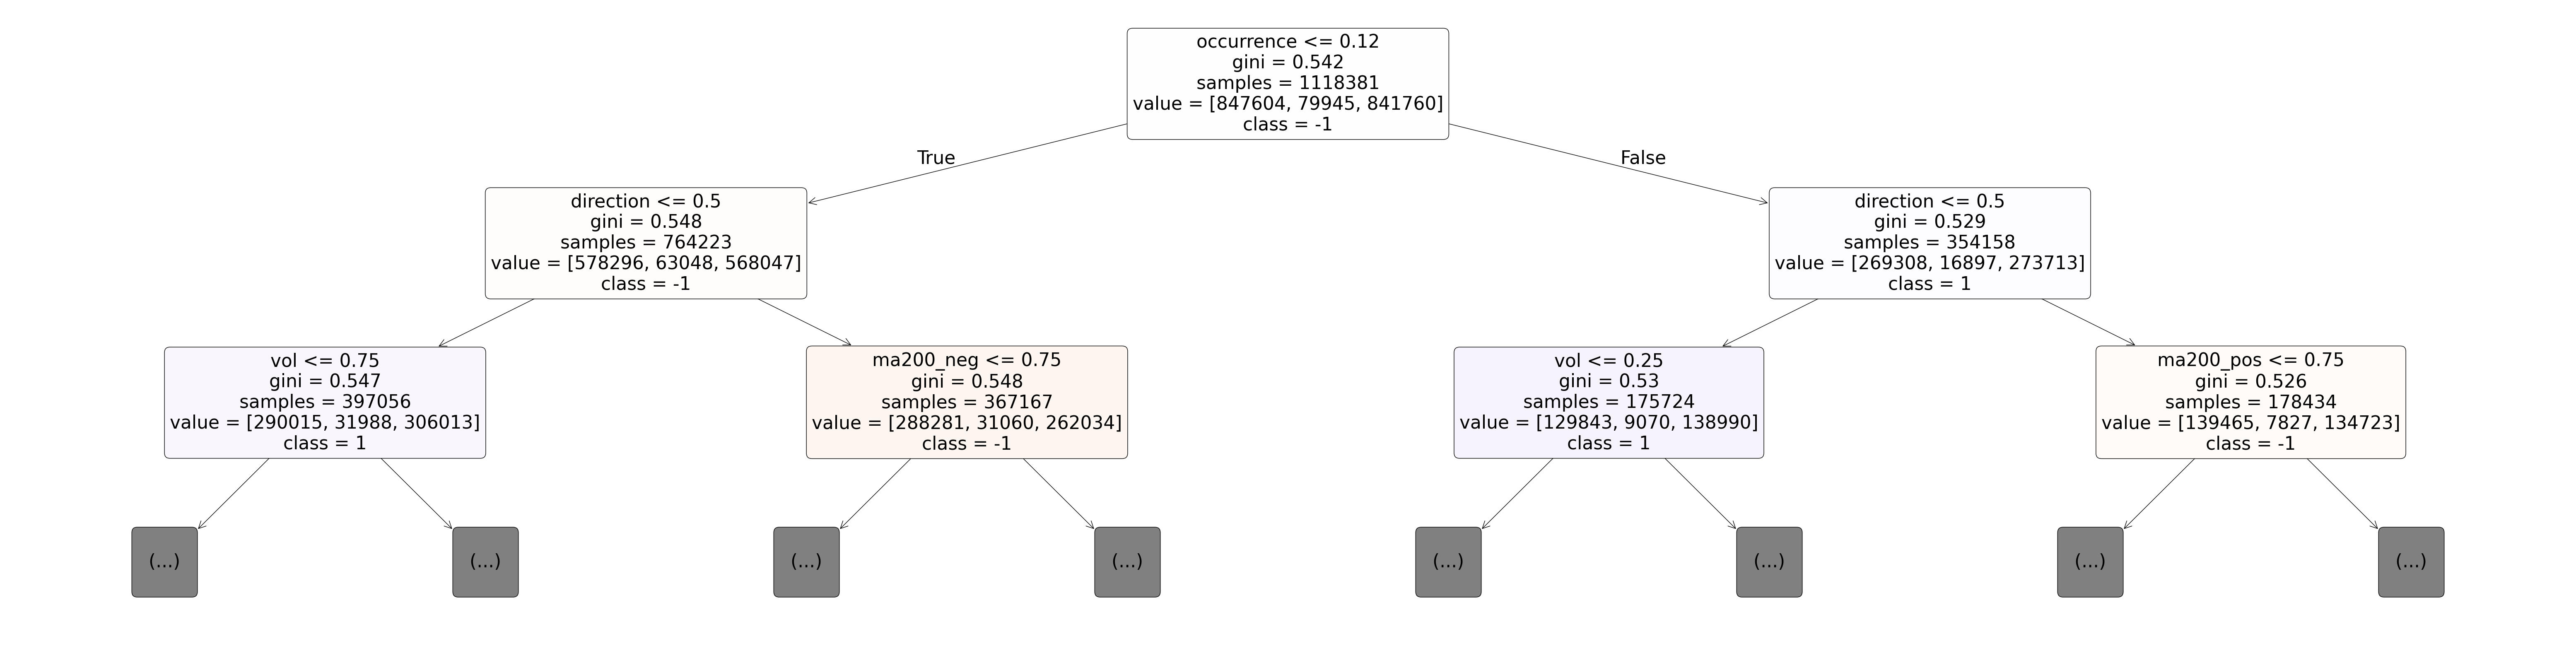

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], feature_names=x_train.columns, max_depth=2, filled=True, rounded=True, class_names=[str(cls) for cls in model.classes_]);
# model.estimator[] selects from different decision trees

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_preds)

0.5455892667702475

In [62]:
model.score(x_train, y_train)

0.5455892667702475

In [63]:
print(model.get_params()['max_depth'])

None


### Predicting validation data with the model

In [64]:
y_val_preds = model.predict(x_val)
accuracy_score(y_val, y_val_preds)

0.4850156444991047

In [65]:
model.score(x_val, y_val)

0.4850156444991047

### Checking the feature importance

In [66]:
importance_df = pd.DataFrame({
    'Feature':x_train.columns, 
    'Importance':model.feature_importances_
}).sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
2,occurrence,0.887124
0,streak_len,0.038709
4,vol,0.012854
6,ma200_pos,0.011027
8,ma200_neg,0.011011
3,performance,0.010360
5,ma5_pos,0.010163
1,direction,0.009432
7,ma5_neg,0.009320


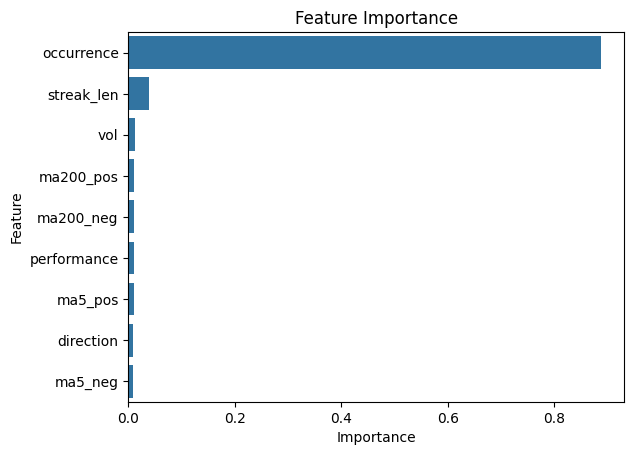

In [67]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='Importance', y='Feature');

### Hyperparameter Tuning with Random Forests

In [68]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [69]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, y_train)

In [70]:
base_train_acc = base_model.score(x_train, y_train)
base_val_acc = base_model.score(x_val, y_val)
print(base_train_acc, base_val_acc)

0.5455892667702475 0.4850156444991047


In [71]:
# helper function to make it easy to test hyperparameters
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_val, y_val)

In [72]:
test_params(max_depth=5)

(0.49474342808407124, 0.49477763107919914)

In [73]:
test_params(max_depth=25)

(0.5452721938338639, 0.48565318044528044)

In [74]:
test_params(max_depth=50)

(0.5455875711930477, 0.4850653813459695)

In [75]:
test_params(max_features='log2')

(0.5455892667702475, 0.4850156444991047)

In [76]:
test_params(max_features=5)

(0.5455887015778477, 0.4850066014360384)